In [98]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [99]:
with open(r'../../results/outcomes/Cost/Analyze result/npv_cost_v03.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br
0,S1,1.580823e+06,0.000000e+00,1.583402e+06,3.164224e+06,8.383210e+05,0.000000e+00,1.515863e+06,2.354184e+06
1,S2,1.547044e+06,0.000000e+00,1.516317e+06,3.063362e+06,1.299831e+07,8.567154e+05,1.515863e+06,1.537089e+07
2,S3,1.547044e+06,0.000000e+00,1.516317e+06,3.063362e+06,3.083448e+07,2.539788e+06,1.515863e+06,3.489013e+07
3,S4,1.341787e+07,8.567154e+05,2.294162e+06,1.656874e+07,8.383210e+05,0.000000e+00,1.515863e+06,2.354184e+06
4,S5,3.183357e+07,2.539788e+06,3.847471e+06,3.822083e+07,8.383210e+05,0.000000e+00,1.515863e+06,2.354184e+06
5,S6,1.369298e+07,8.567154e+05,2.294162e+06,1.684386e+07,3.994539e+06,8.567154e+05,1.515863e+06,6.367118e+06
6,S7,1.341787e+07,8.567154e+05,2.294162e+06,1.656874e+07,1.299831e+07,8.567154e+05,1.515863e+06,1.537089e+07
7,S8,1.369298e+07,8.567154e+05,2.294162e+06,1.684386e+07,1.976700e+06,8.567154e+05,1.515863e+06,4.349279e+06
8,S9,1.341787e+07,8.567154e+05,2.294162e+06,1.656874e+07,5.791744e+06,8.567154e+05,1.515863e+06,8.164323e+06
9,S10,3.248612e+07,2.539788e+06,3.847471e+06,3.887338e+07,9.478124e+06,2.539788e+06,1.515863e+06,1.353378e+07


In [100]:
df_cost = df_cost.set_index('Strategy')

In [101]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [102]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1.580823e+06,0.000000e+00,1.583402e+06,8.383210e+05,0.000000e+00,1.515863e+06
S2,1.547044e+06,0.000000e+00,1.516317e+06,1.299831e+07,8.567154e+05,1.515863e+06
S3,1.547044e+06,0.000000e+00,1.516317e+06,3.083448e+07,2.539788e+06,1.515863e+06
S4,1.341787e+07,8.567154e+05,2.294162e+06,8.383210e+05,0.000000e+00,1.515863e+06
S5,3.183357e+07,2.539788e+06,3.847471e+06,8.383210e+05,0.000000e+00,1.515863e+06
S6,1.369298e+07,8.567154e+05,2.294162e+06,3.994539e+06,8.567154e+05,1.515863e+06
S7,1.341787e+07,8.567154e+05,2.294162e+06,1.299831e+07,8.567154e+05,1.515863e+06
S8,1.369298e+07,8.567154e+05,2.294162e+06,1.976700e+06,8.567154e+05,1.515863e+06
S9,1.341787e+07,8.567154e+05,2.294162e+06,5.791744e+06,8.567154e+05,1.515863e+06


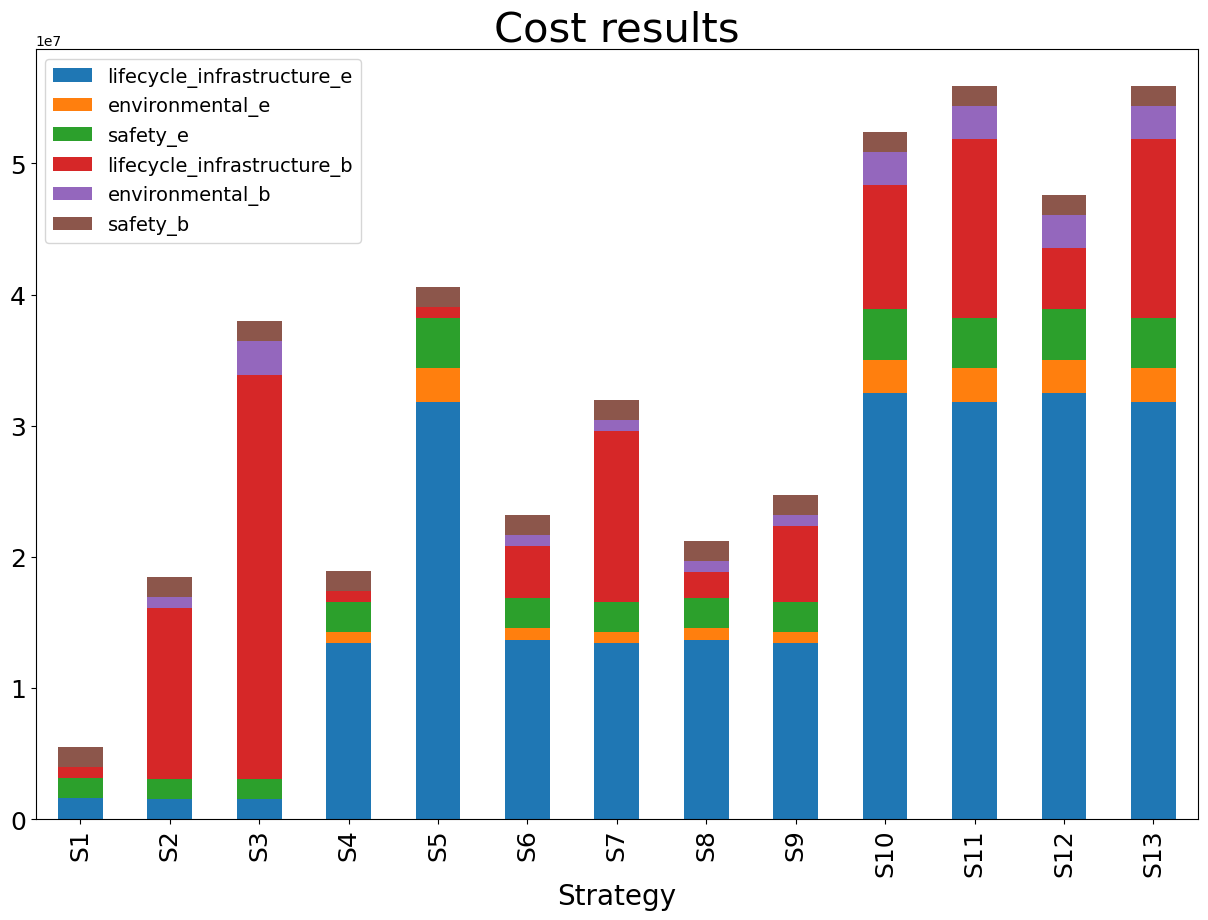

In [103]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

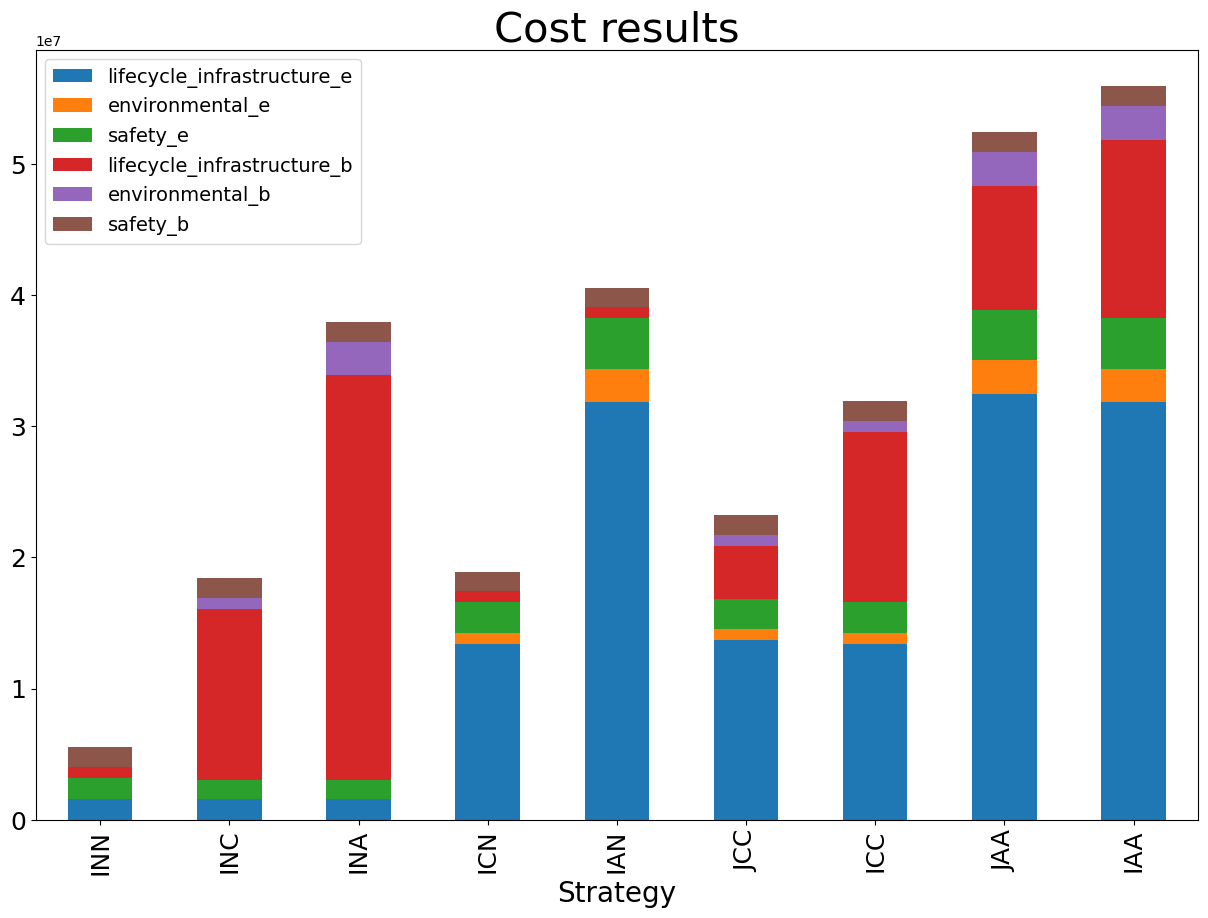

In [104]:
# Filter out the unwanted rows and rename the strategies according to the given mapping
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

df_cost_filtered =df_cost.drop(['S8', 'S9', 'S12', 'S13'])
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# plotting cost results
df_cost_filtered.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-modified.png')

In [93]:
df_cost
#df_cost_filtered

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1.589263e+06,0.000000e+00,1.608570e+06,8.383210e+05,0.000000e+00,1.515863e+06
S2,1.547044e+06,0.000000e+00,1.516317e+06,1.299831e+07,8.567154e+05,1.515863e+06
S3,1.547044e+06,0.000000e+00,1.516317e+06,3.083448e+07,2.539788e+06,1.515863e+06
S4,1.341787e+07,8.567154e+05,2.294162e+06,8.383210e+05,0.000000e+00,1.515863e+06
S5,3.183357e+07,2.539788e+06,3.847471e+06,8.383210e+05,0.000000e+00,1.515863e+06
S6,1.369298e+07,8.567154e+05,2.294162e+06,3.994539e+06,8.567154e+05,1.515863e+06
S7,1.341787e+07,8.567154e+05,2.294162e+06,1.299831e+07,8.567154e+05,1.515863e+06
S8,1.369298e+07,8.567154e+05,2.294162e+06,1.976700e+06,8.567154e+05,1.515863e+06
S9,1.341787e+07,8.567154e+05,2.294162e+06,5.791744e+06,8.567154e+05,1.515863e+06


In [50]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,INN,0.000000,0.0,0.000000,0.0
1,INC,0.000000,0.0,1020.823948,710000.0
2,INA,0.000000,0.0,2220.392903,1370000.0
3,ICN,1020.823948,325000000.0,0.000000,0.0
4,IAN,2220.392903,623000000.0,0.000000,0.0
5,JCC,1020.823948,325000000.0,1020.823948,710000.0
6,ICC,1020.823948,325000000.0,1020.823948,710000.0
7,JAA,2220.392903,623000000.0,2220.392903,1370000.0
8,IAA,2220.392903,623000000.0,2220.392903,1370000.0


In [51]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [52]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
INN,0.000000,0.0,0.000000,0.0
INC,0.000000,0.0,1020.823948,710000.0
INA,0.000000,0.0,2220.392903,1370000.0
ICN,1020.823948,325000000.0,0.000000,0.0
IAN,2220.392903,623000000.0,0.000000,0.0
JCC,1020.823948,325000000.0,1020.823948,710000.0
ICC,1020.823948,325000000.0,1020.823948,710000.0
JAA,2220.392903,623000000.0,2220.392903,1370000.0
IAA,2220.392903,623000000.0,2220.392903,1370000.0


In [53]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [54]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
INN,0.0,0.0
INC,0.0,710000.0
INA,0.0,1370000.0
ICN,325000000.0,0.0
IAN,623000000.0,0.0
JCC,325000000.0,710000.0
ICC,325000000.0,710000.0
JAA,623000000.0,1370000.0
IAA,623000000.0,1370000.0


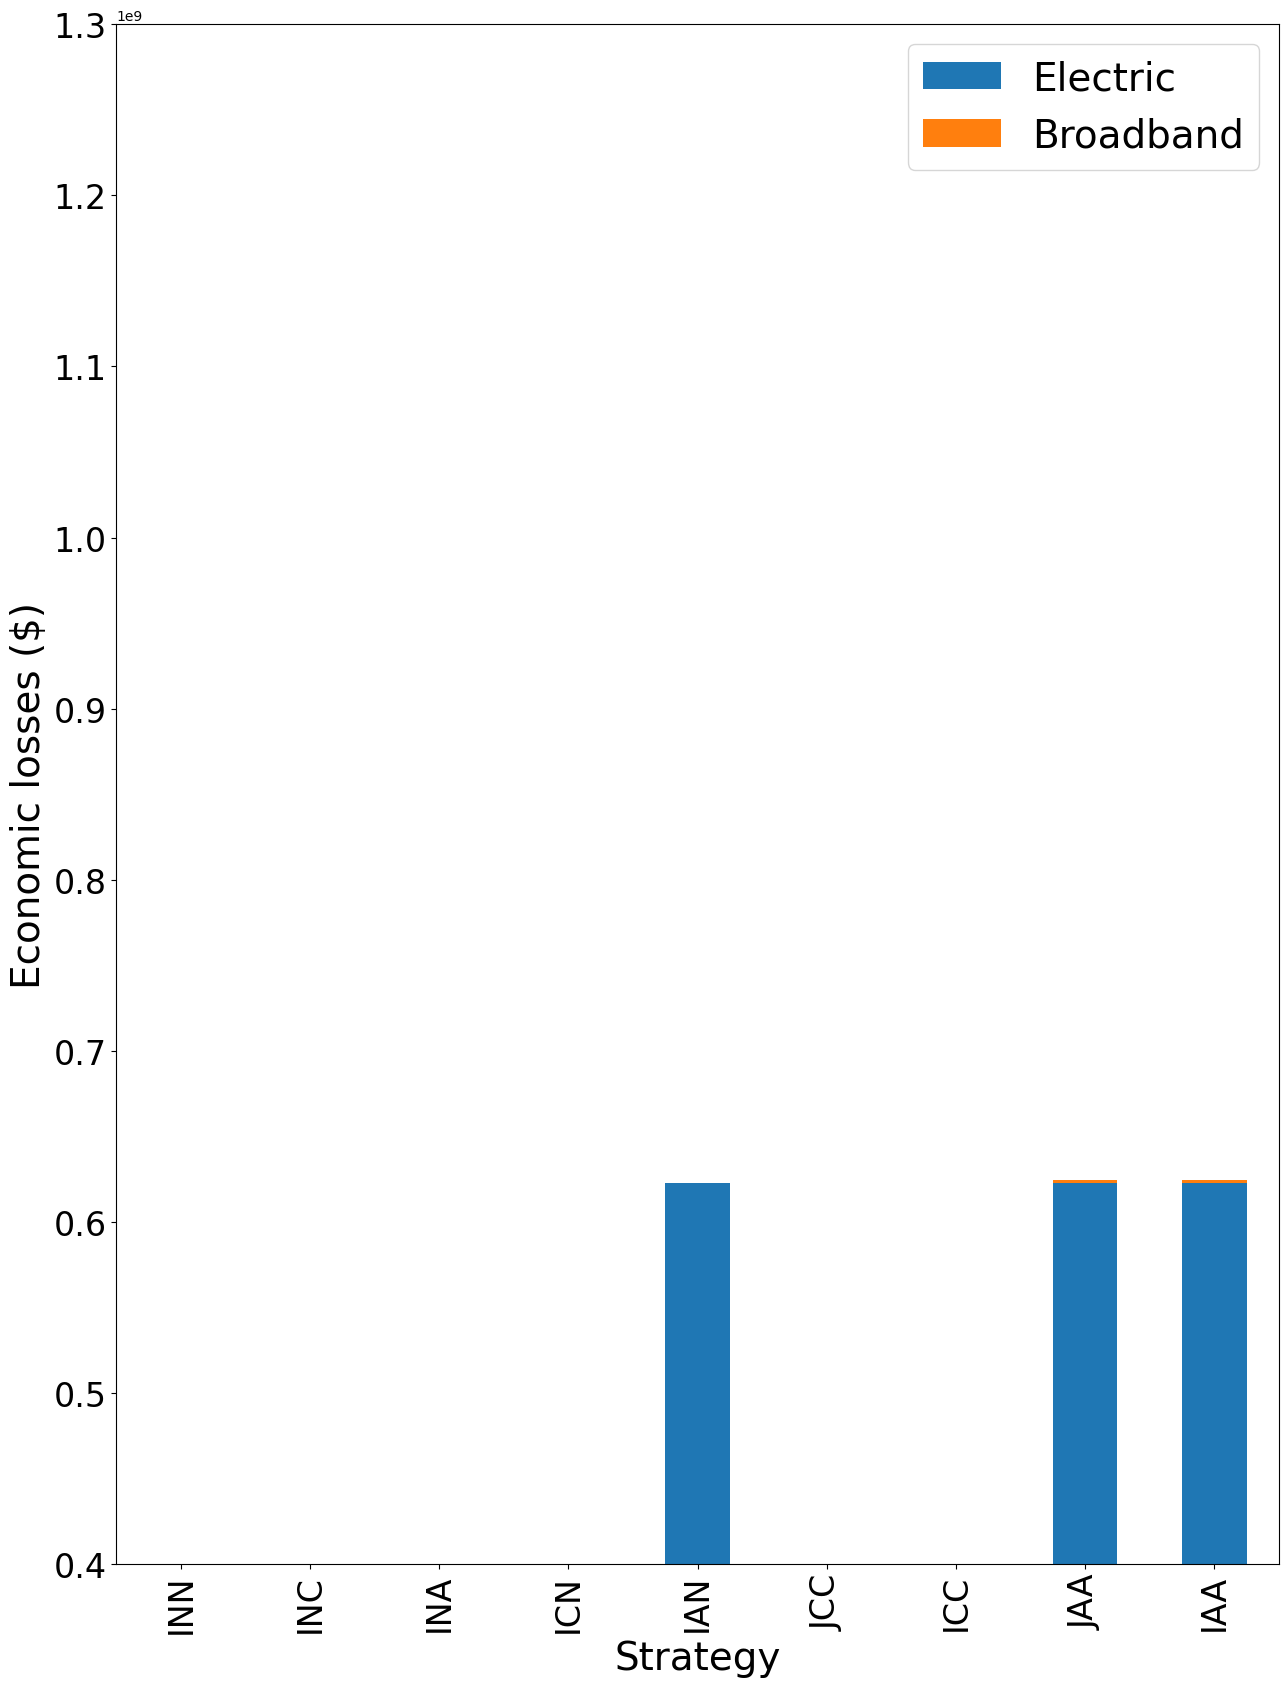

In [55]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [56]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [57]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
INN,0.000000,0.000000
INC,0.000000,1020.823948
INA,0.000000,2220.392903
ICN,1020.823948,0.000000
IAN,2220.392903,0.000000
JCC,1020.823948,1020.823948
ICC,1020.823948,1020.823948
JAA,2220.392903,2220.392903
IAA,2220.392903,2220.392903


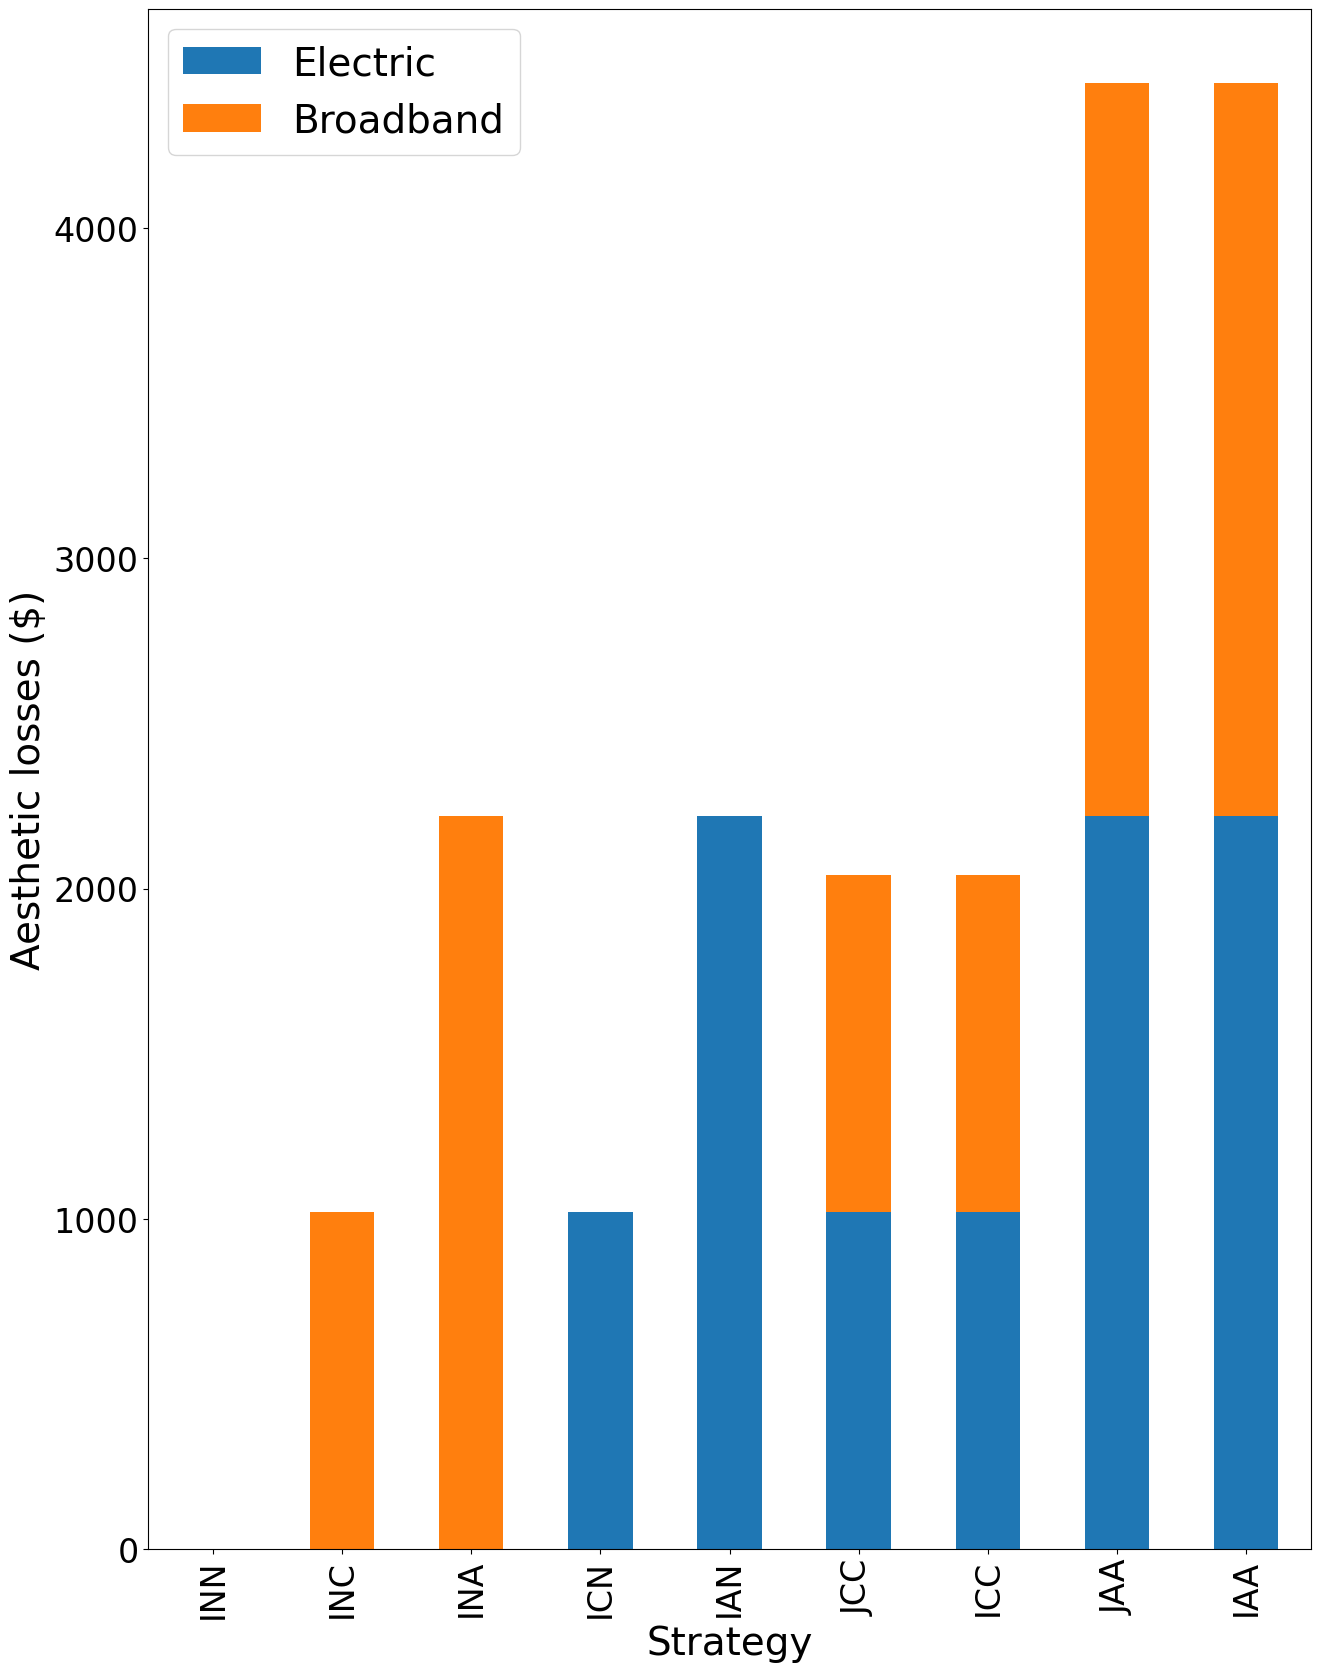

In [58]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [61]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_v02.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,2430000.0,0.000000e+00,2880000.0,5210000.0,0.0,0.0,-5210000.0
1,INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
2,INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0
4,IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0
5,JCC,17700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0
6,ICC,26400000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0
7,JAA,42000000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0
8,IAA,45500000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0


In [62]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [63]:
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,2430000.0,0.000000e+00,2880000.0,5210000.0,0.0,0.0,-5210000.0
1,INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
2,INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0
4,IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0
5,JCC,17700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0
6,ICC,26400000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0
7,JAA,42000000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0
8,IAA,45500000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0


In [64]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [65]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [66]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [67]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5210000.0,-18400000.0,-38000000.0,303000000.0,581000000.0,289000000.0,287000000.0,547000000.0,545000000.0


In [68]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [69]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5210000.0,-18400000.0,-38000000.0,303000000.0,581000000.0,289000000.0,287000000.0,547000000.0,545000000.0


In [70]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [71]:
df_npv_net_benefit

,Strategy,net_benefit
0,INN,-5210000.0
1,INC,-18400000.0
2,INA,-38000000.0
3,ICN,303000000.0
4,IAN,581000000.0
5,JCC,289000000.0
6,ICC,287000000.0
7,JAA,547000000.0
8,IAA,545000000.0


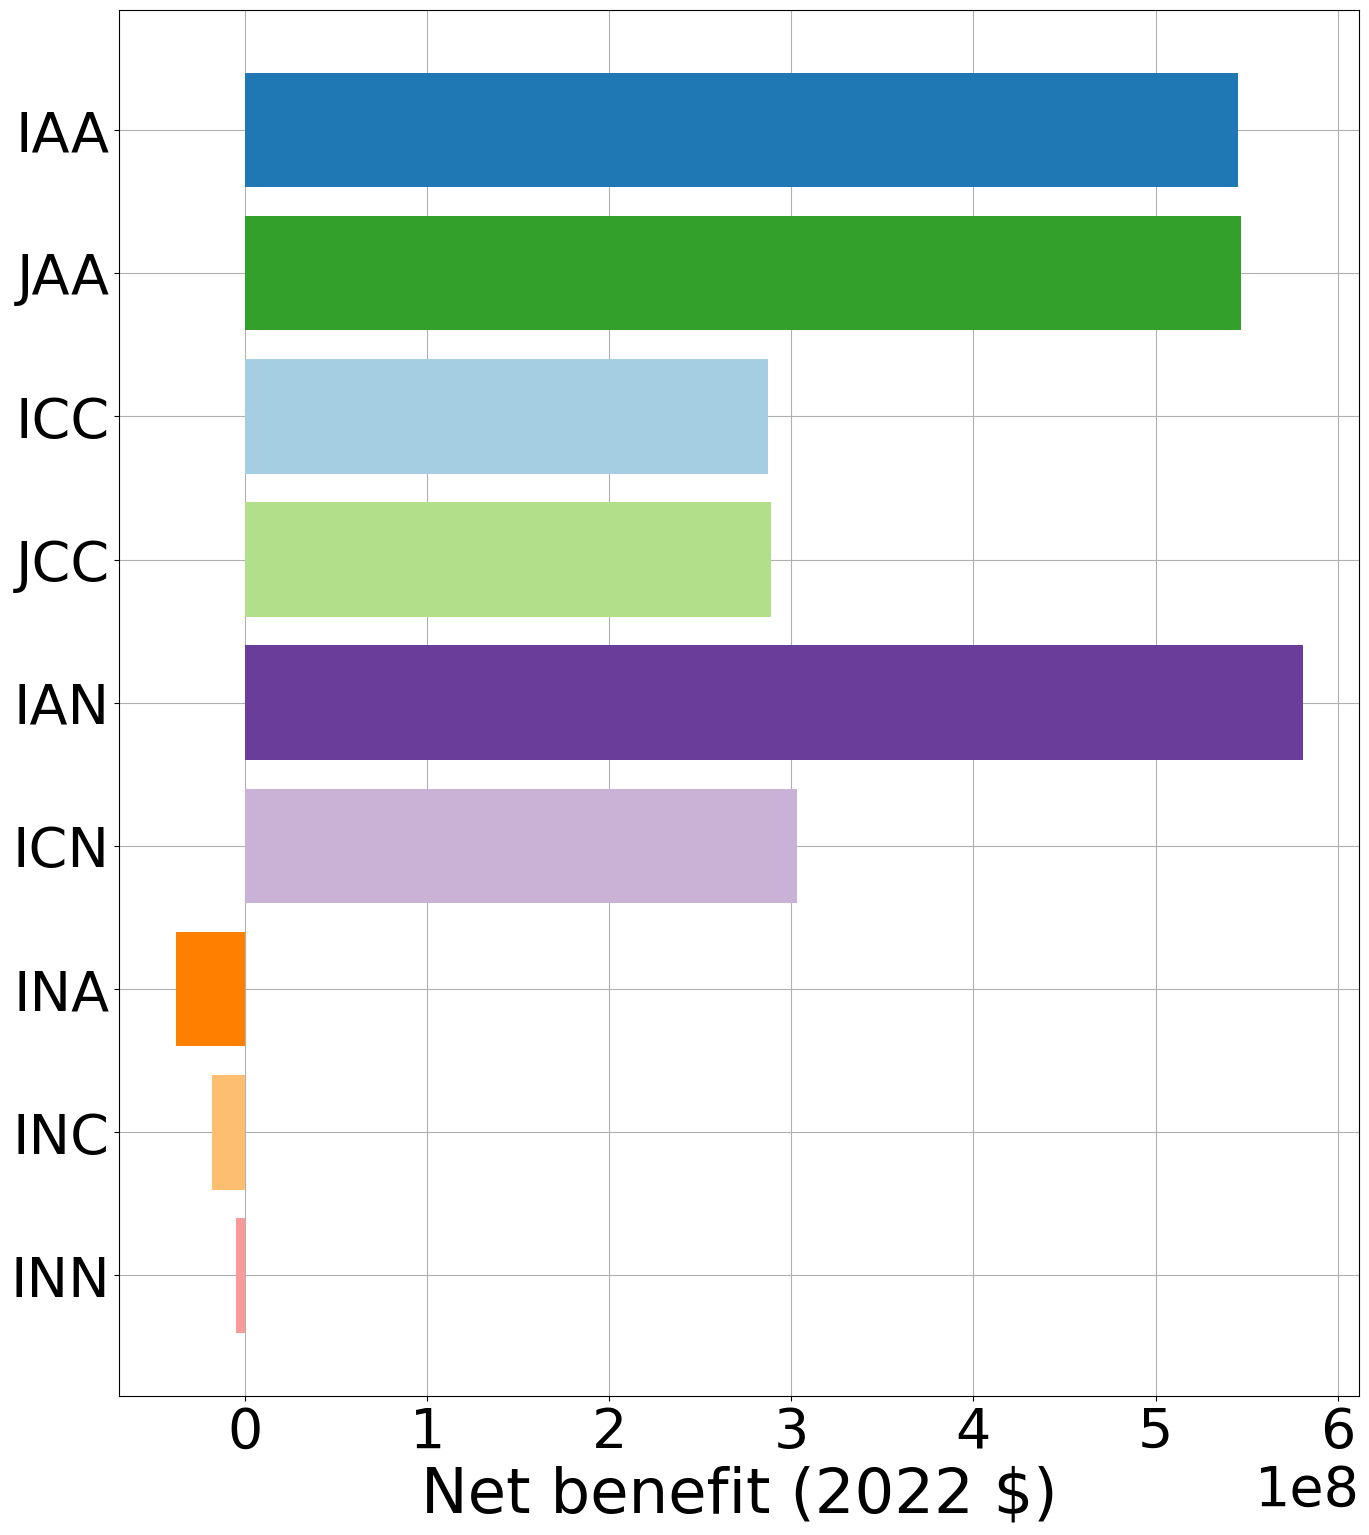

In [72]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.yticks(df_npv_net_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid()
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

In [73]:
# plotting graph (new version)
#ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
#plt.show()

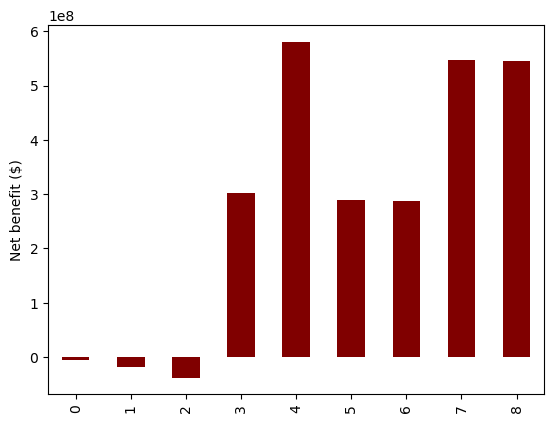

In [74]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

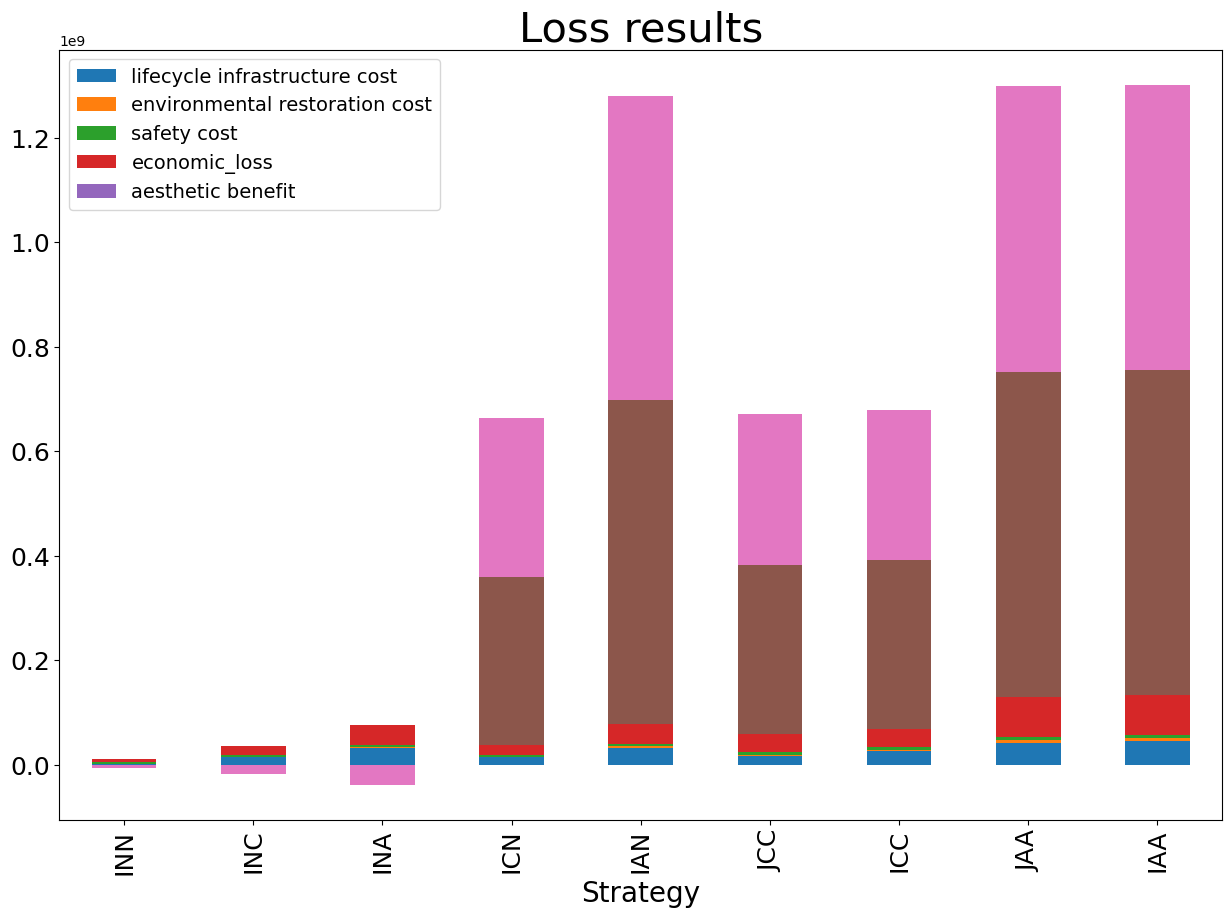

In [75]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [76]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,2430000.0,0.000000e+00,2880000.0,5210000.0,0.0,0.0,-5210000.0
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0
ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0
IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0
JCC,17700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0
ICC,26400000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0
JAA,42000000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0
IAA,45500000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0


In [77]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','economic_losses', 'aesthetic_benefit'], axis=1)

In [78]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,2430000.0,0.000000e+00,2880000.0
INC,14500000.0,8.567154e+05,3030000.0
INA,32400000.0,2.539788e+06,3030000.0
ICN,14300000.0,8.567154e+05,3810000.0
IAN,32700000.0,2.539788e+06,3810000.0
JCC,17700000.0,1.713431e+06,5360000.0
ICC,26400000.0,1.713431e+06,5360000.0
JAA,42000000.0,5.079576e+06,6840000.0
IAA,45500000.0,5.079576e+06,6840000.0


In [79]:
df_npv_cost=df_npv_cost.reset_index()

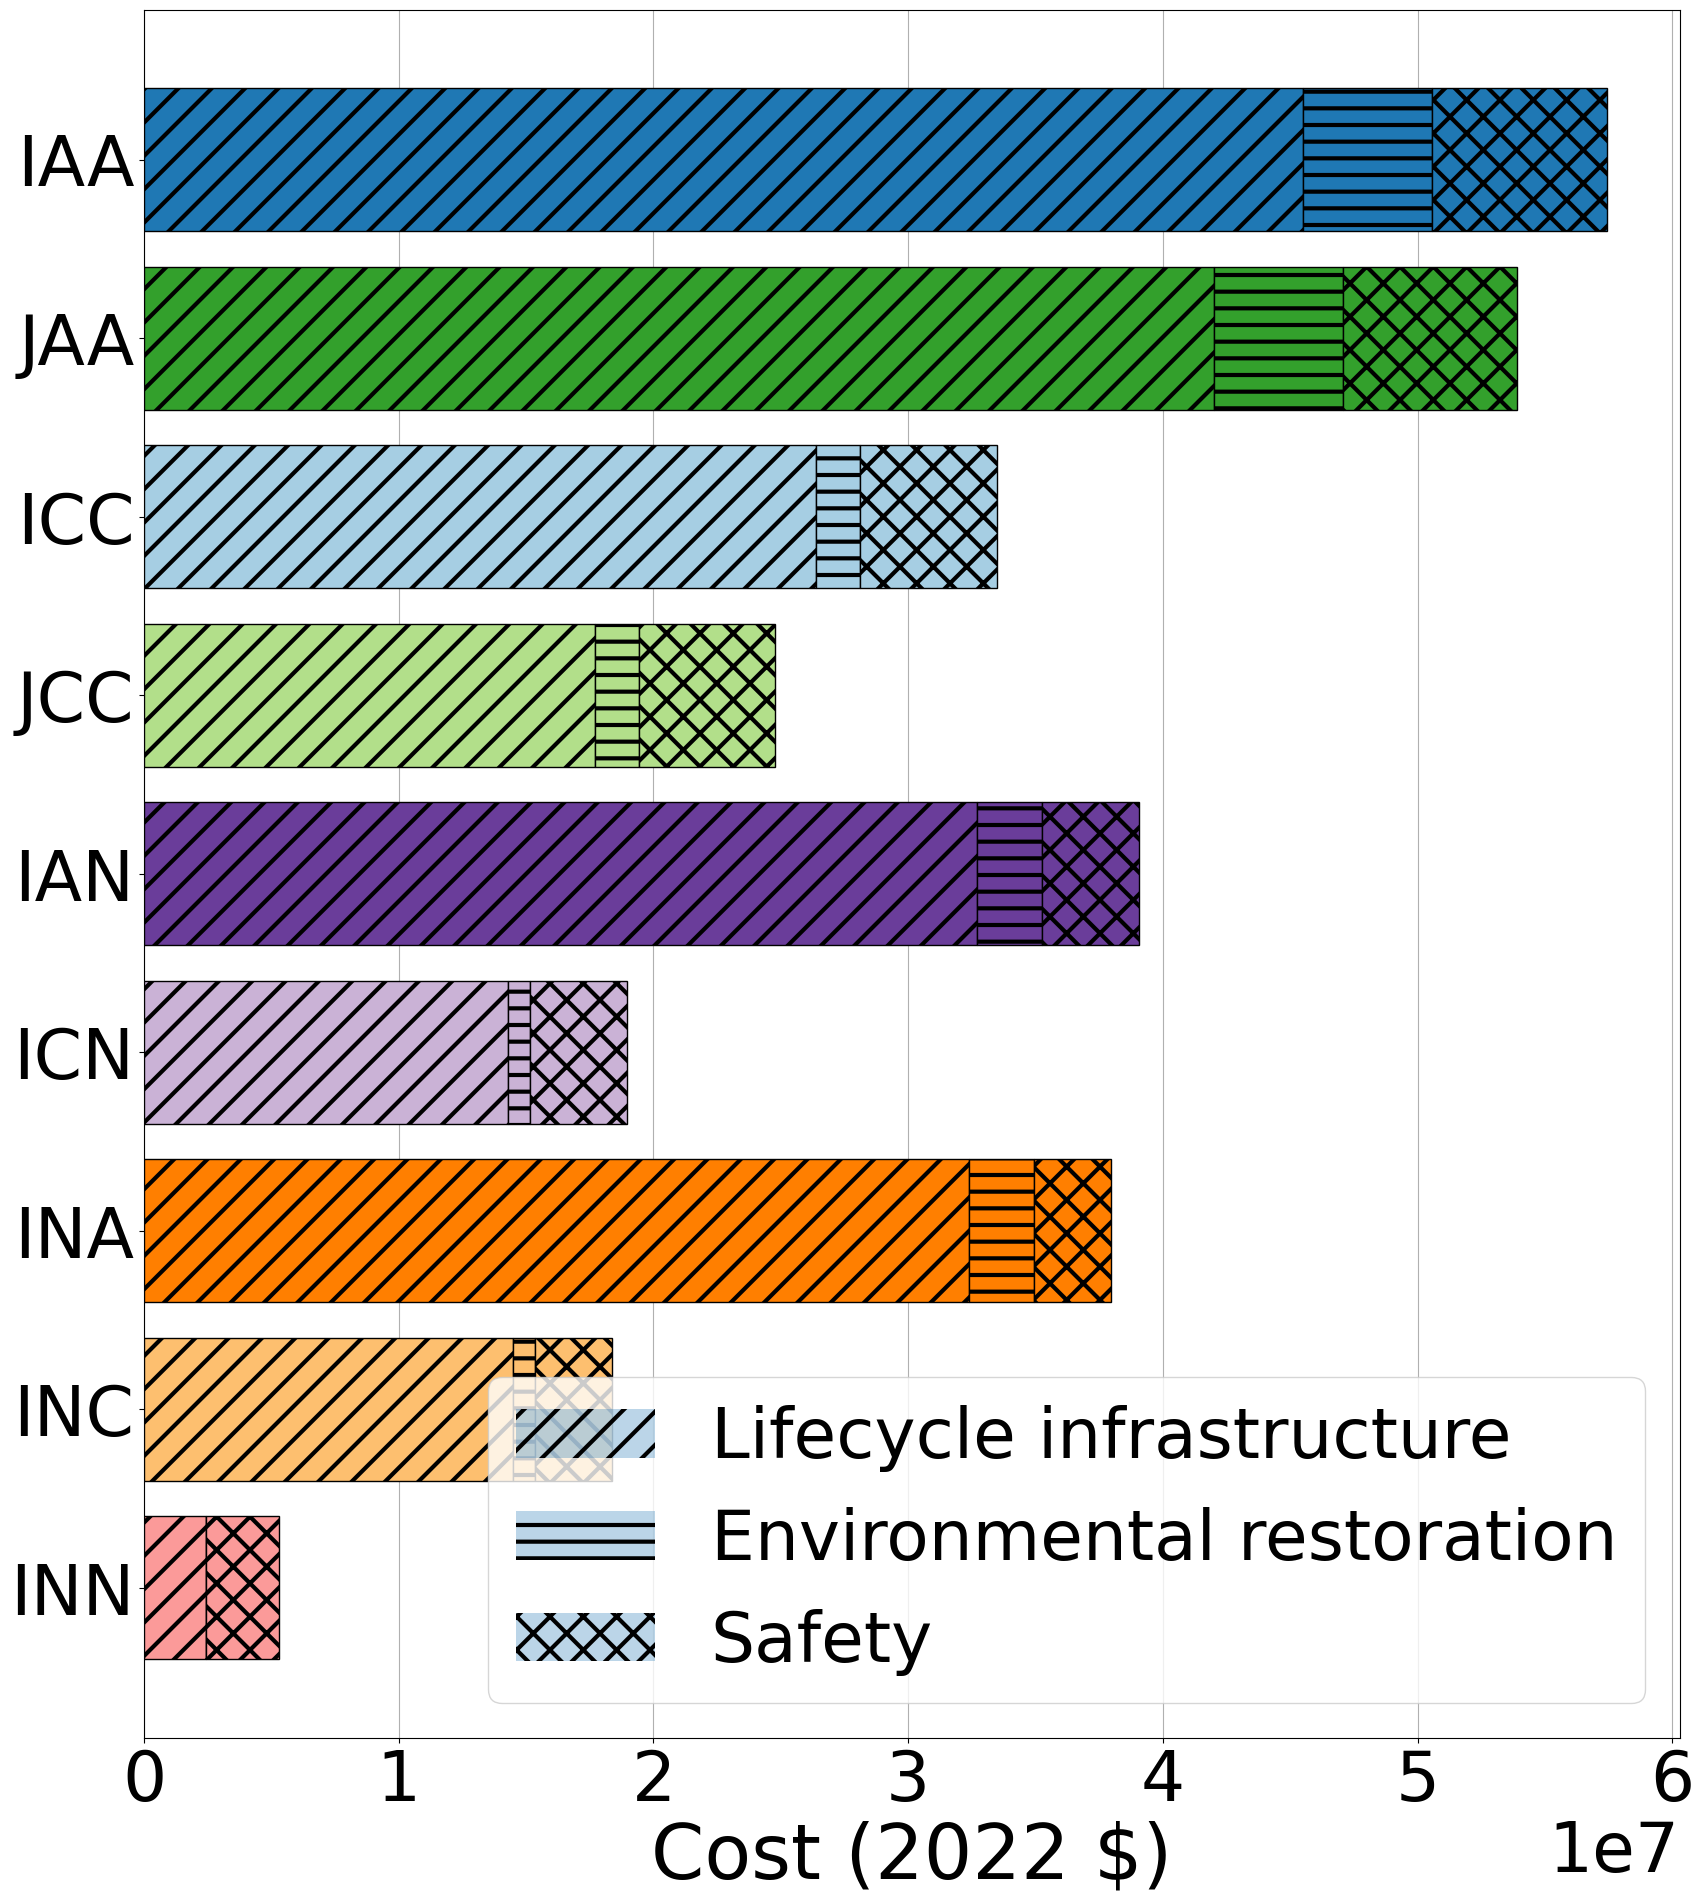

In [80]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

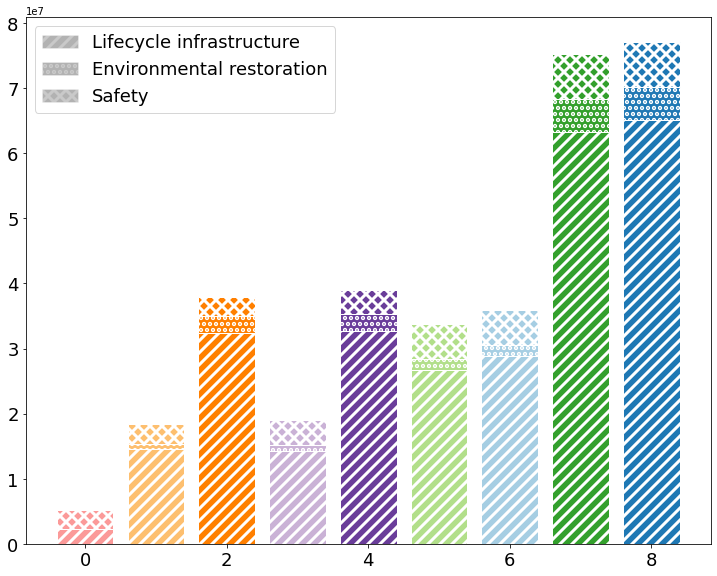

In [199]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

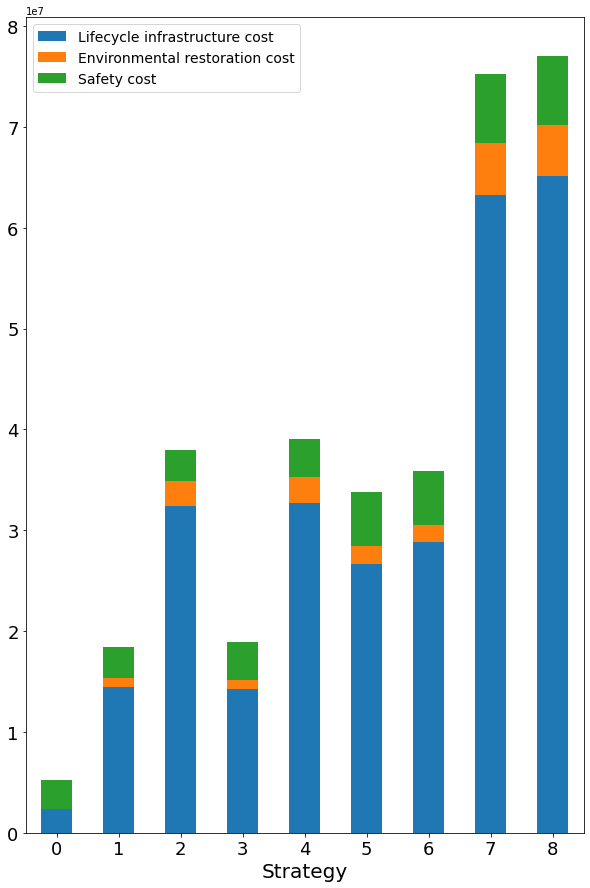

In [200]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [201]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [202]:
df_npv_loss

,economic_losses
Strategy,
INN,0.0
INC,0.0
INA,0.0
ICN,322000000.0
IAN,620000000.0
JCC,323000000.0
ICC,323000000.0
JAA,622000000.0
IAA,622000000.0


In [203]:
df_npv_loss=df_npv_loss.reset_index()

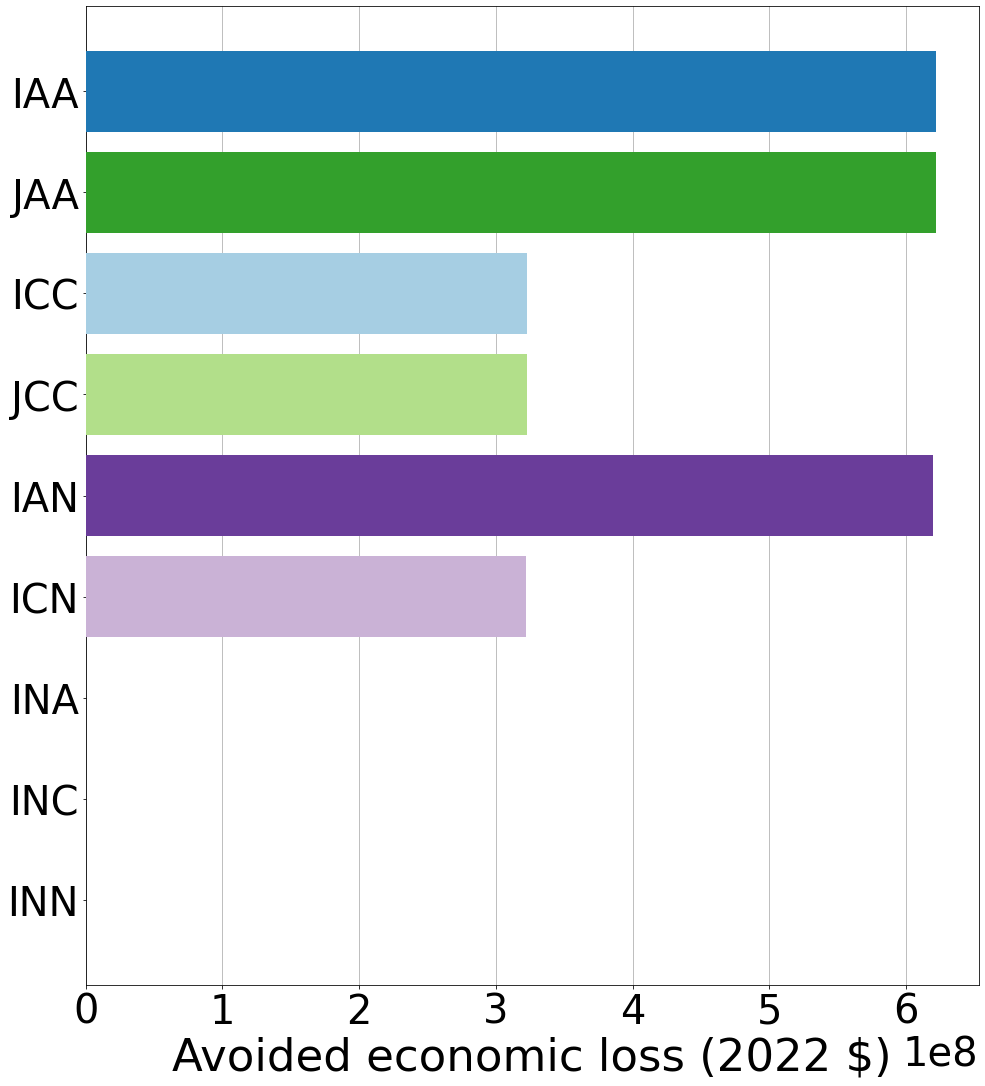

In [204]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [205]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

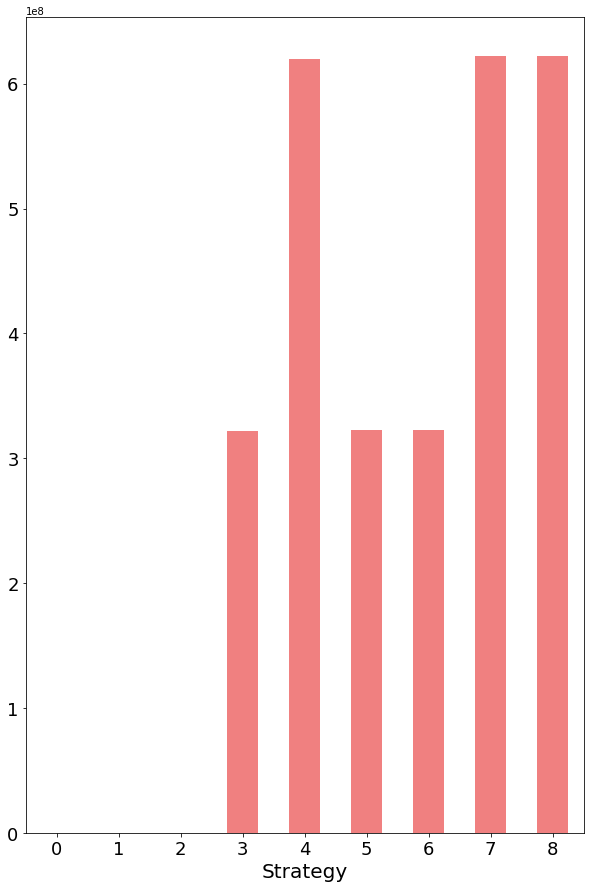

In [206]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [207]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [208]:
df_npv_benefit

,aesthetic_benefit
Strategy,
INN,0.0
INC,1020.0
INA,2220.0
ICN,1020.0
IAN,2220.0
JCC,2040.0
ICC,2040.0
JAA,4440.0
IAA,4440.0


In [209]:
df_npv_benefit=df_npv_benefit.reset_index()

In [210]:
df_npv_benefit

,Strategy,aesthetic_benefit
0,INN,0.0
1,INC,1020.0
2,INA,2220.0
3,ICN,1020.0
4,IAN,2220.0
5,JCC,2040.0
6,ICC,2040.0
7,JAA,4440.0
8,IAA,4440.0


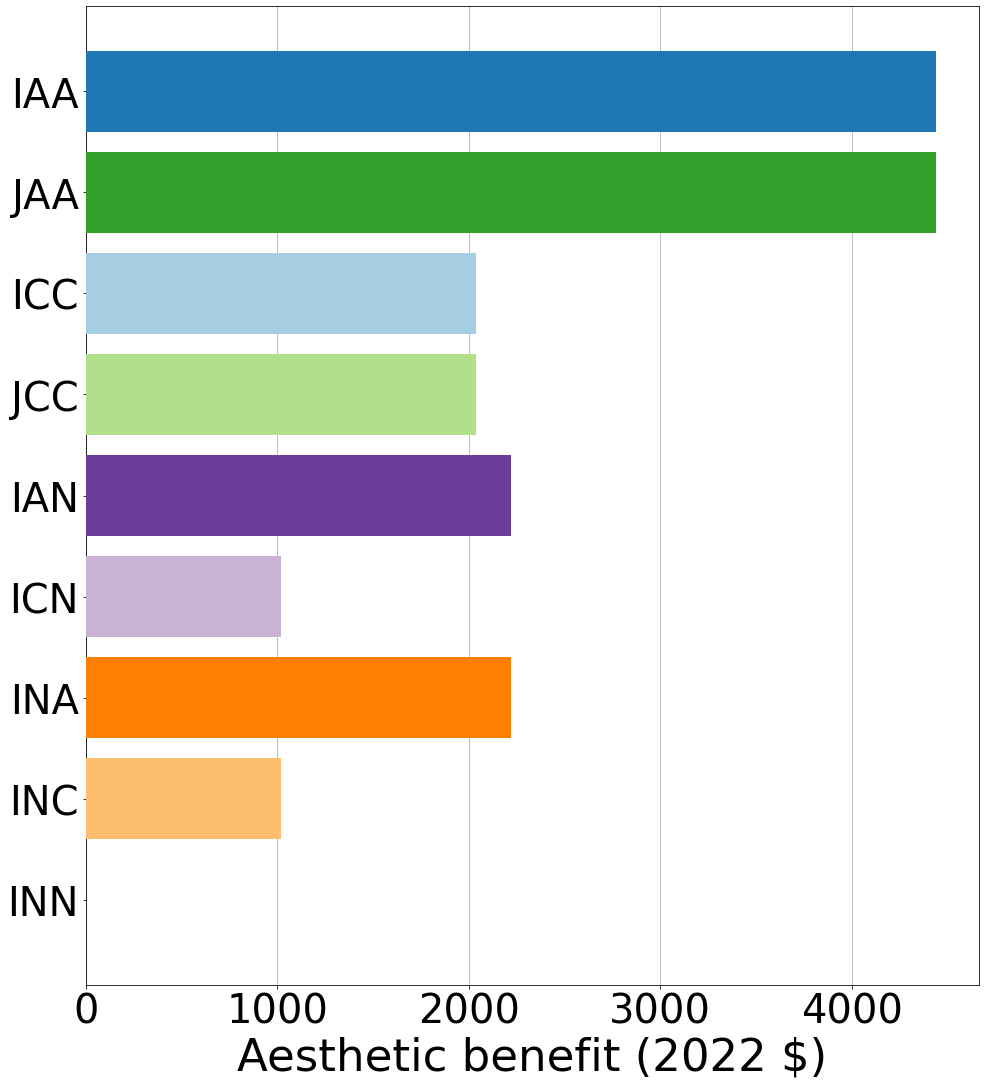

In [211]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [212]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

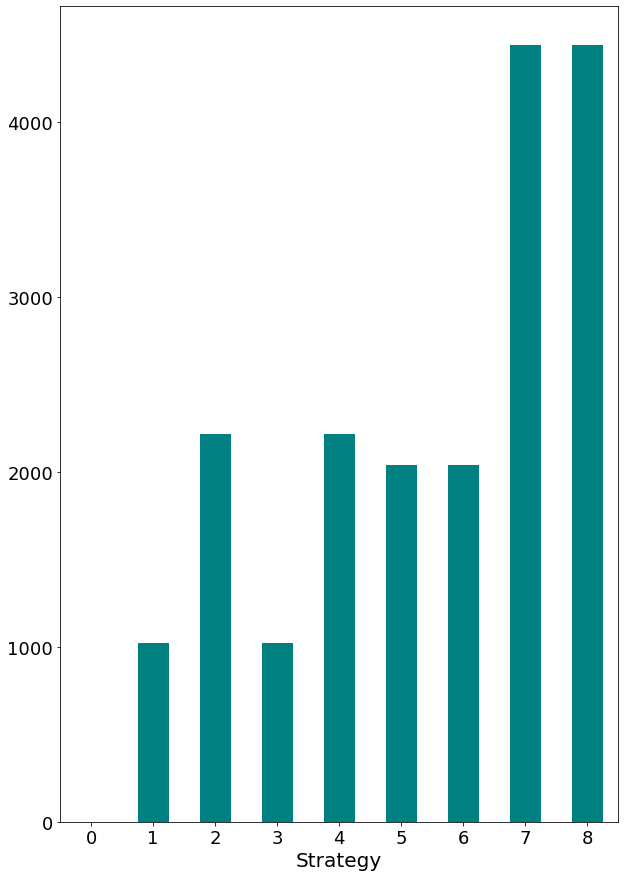

In [213]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [214]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,INC,12200000.0,8.567154e+05,150000.0,13200000.0,1020.0,0.0,-13200000.0
2,INA,30100000.0,2.539788e+06,150000.0,32800000.0,2220.0,0.0,-32800000.0
3,ICN,12000000.0,8.567154e+05,930000.0,13800000.0,1020.0,322000000.0,308000000.0
4,IAN,30400000.0,2.539788e+06,930000.0,33800000.0,2220.0,620000000.0,586000000.0
5,JCC,24400000.0,1.713431e+06,2480000.0,28600000.0,2040.0,323000000.0,294000000.0
6,ICC,26500000.0,1.713431e+06,2480000.0,30700000.0,2040.0,323000000.0,292000000.0
7,JAA,61000000.0,5.079576e+06,3960000.0,70000000.0,4440.0,622000000.0,552000000.0
8,IAA,62800000.0,5.079576e+06,3960000.0,71800000.0,4440.0,622000000.0,550000000.0


In [215]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [216]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [217]:
df_npv_net_benefit_relative

,net_benefit
Strategy,
INN,0.0
INC,-13200000.0
INA,-32800000.0
ICN,308000000.0
IAN,586000000.0
JCC,294000000.0
ICC,292000000.0
JAA,552000000.0
IAA,550000000.0


In [218]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

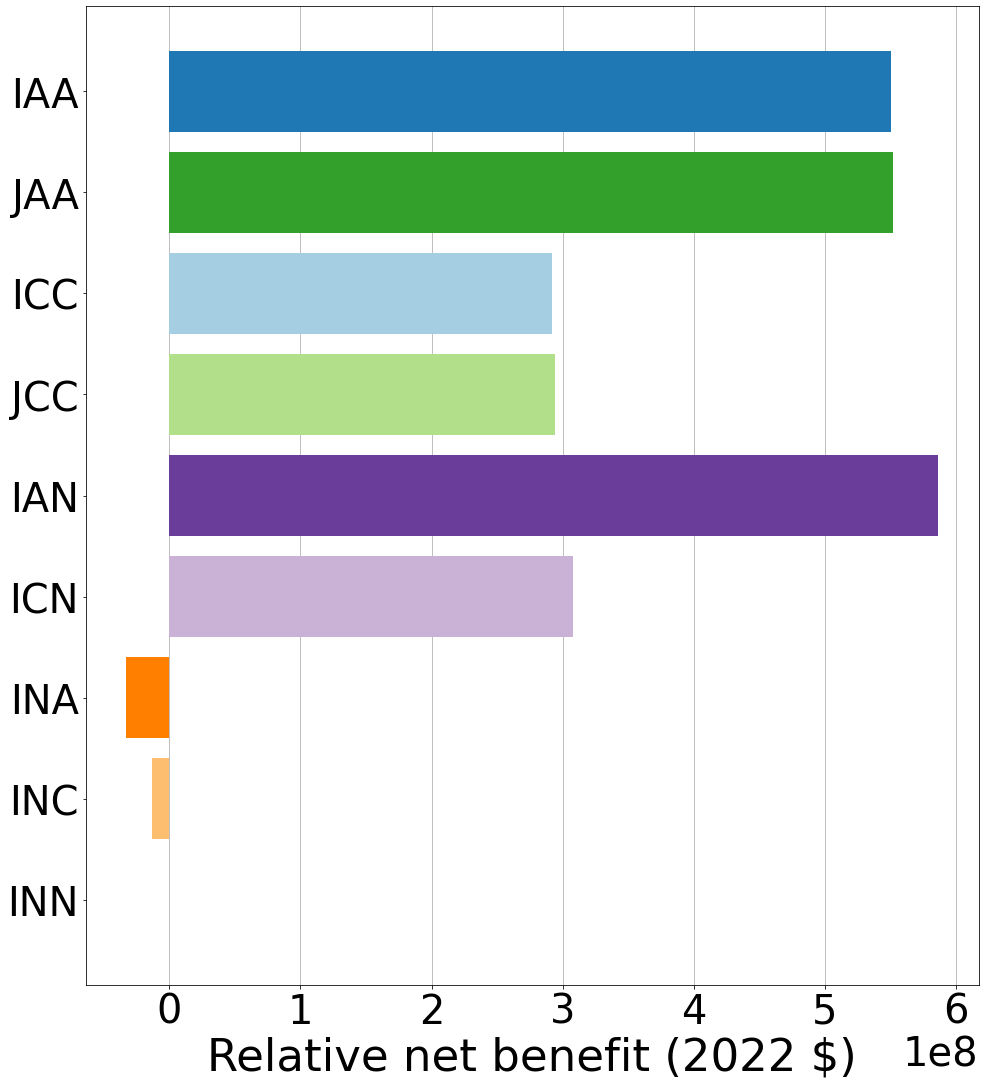

In [219]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [220]:
# plotting graph (Ver 02)
#ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
#plt.show()

<AxesSubplot:ylabel='Relative net benefit ($)'>

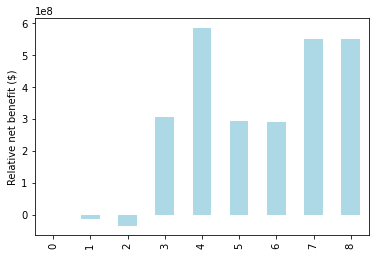

In [221]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [222]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [223]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,economic_losses
Strategy,,,,,
INN,0.0,0.000000e+00,0.0,0.0,0.0
INC,12200000.0,8.567154e+05,150000.0,1020.0,0.0
INA,30100000.0,2.539788e+06,150000.0,2220.0,0.0
ICN,12000000.0,8.567154e+05,930000.0,1020.0,322000000.0
IAN,30400000.0,2.539788e+06,930000.0,2220.0,620000000.0
JCC,24400000.0,1.713431e+06,2480000.0,2040.0,323000000.0
ICC,26500000.0,1.713431e+06,2480000.0,2040.0,323000000.0
JAA,61000000.0,5.079576e+06,3960000.0,4440.0,622000000.0
IAA,62800000.0,5.079576e+06,3960000.0,4440.0,622000000.0


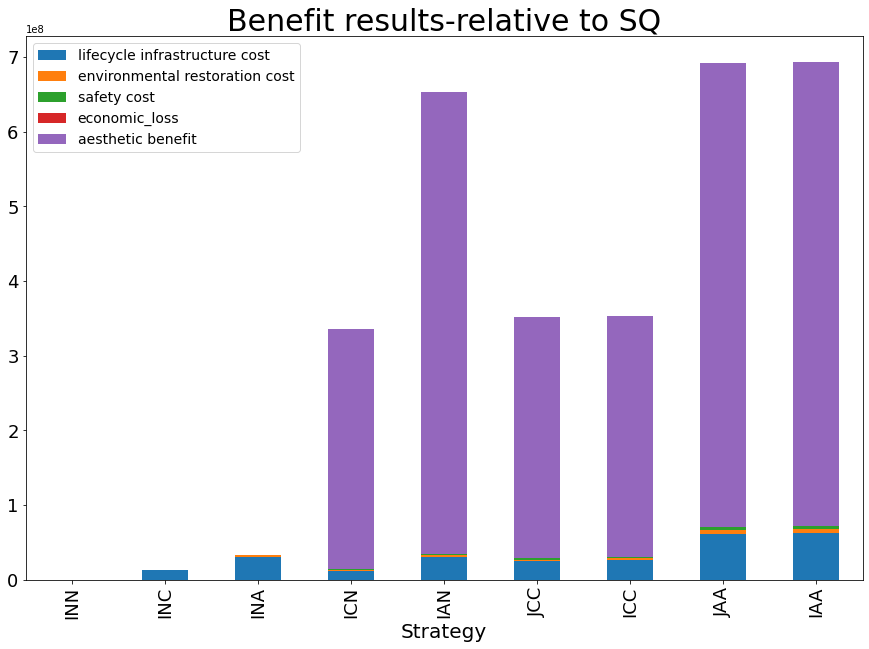

In [224]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [225]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

In [226]:
df_npv_cost_relative

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,0.0,0.000000e+00,0.0
INC,12200000.0,8.567154e+05,150000.0
INA,30100000.0,2.539788e+06,150000.0
ICN,12000000.0,8.567154e+05,930000.0
IAN,30400000.0,2.539788e+06,930000.0
JCC,24400000.0,1.713431e+06,2480000.0
ICC,26500000.0,1.713431e+06,2480000.0
JAA,61000000.0,5.079576e+06,3960000.0
IAA,62800000.0,5.079576e+06,3960000.0


In [227]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

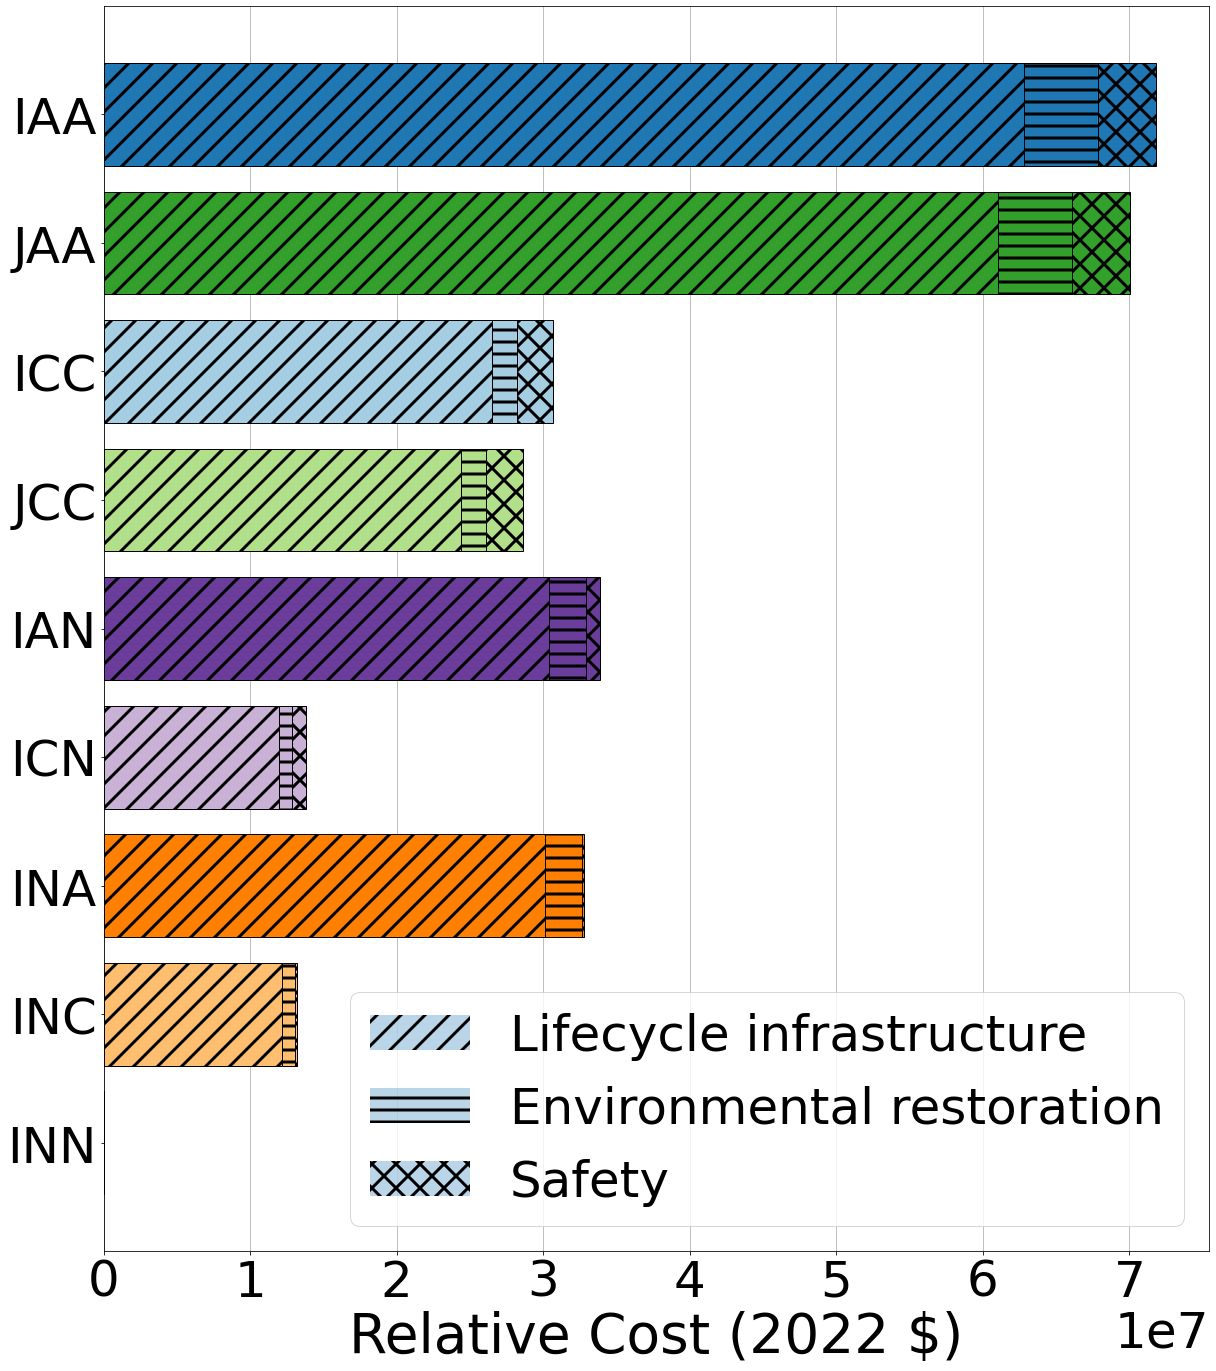

In [238]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)

x= df_npv_cost_relative.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']

mpl.rcParams['hatch.linewidth'] = 3.0 


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3

circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()
plt.xlabel("Relative Cost (2022 $)", fontsize=55)

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

In [239]:
### Pareto plot



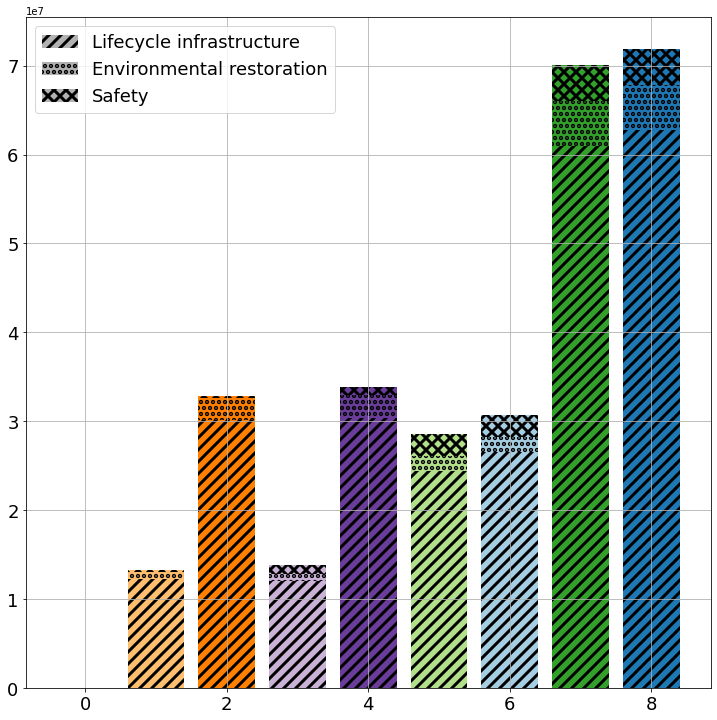

In [145]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

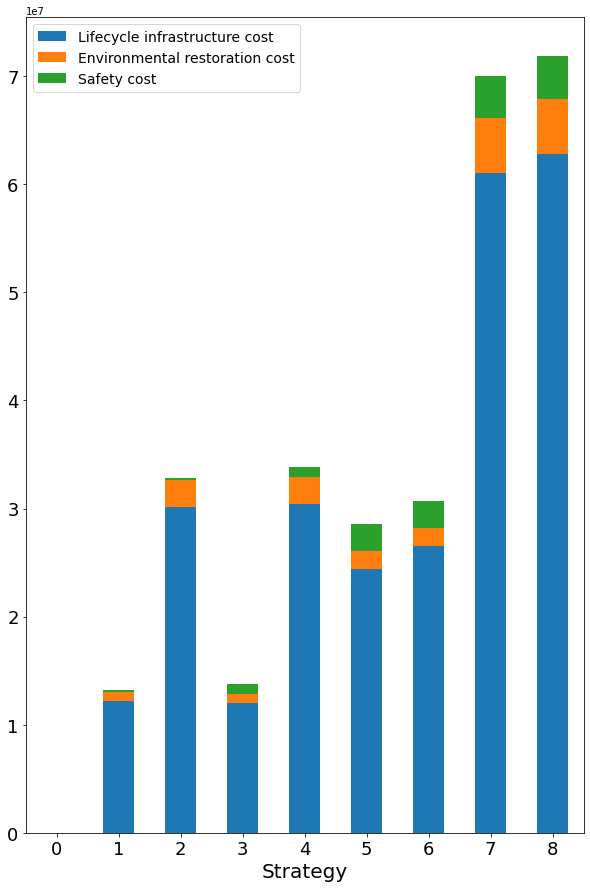

In [146]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)

In [147]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [148]:
df_npv_loss_relative

,economic_losses
Strategy,
INN,0.0
INC,0.0
INA,0.0
ICN,322000000.0
IAN,620000000.0
JCC,323000000.0
ICC,323000000.0
JAA,622000000.0
IAA,622000000.0


In [149]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

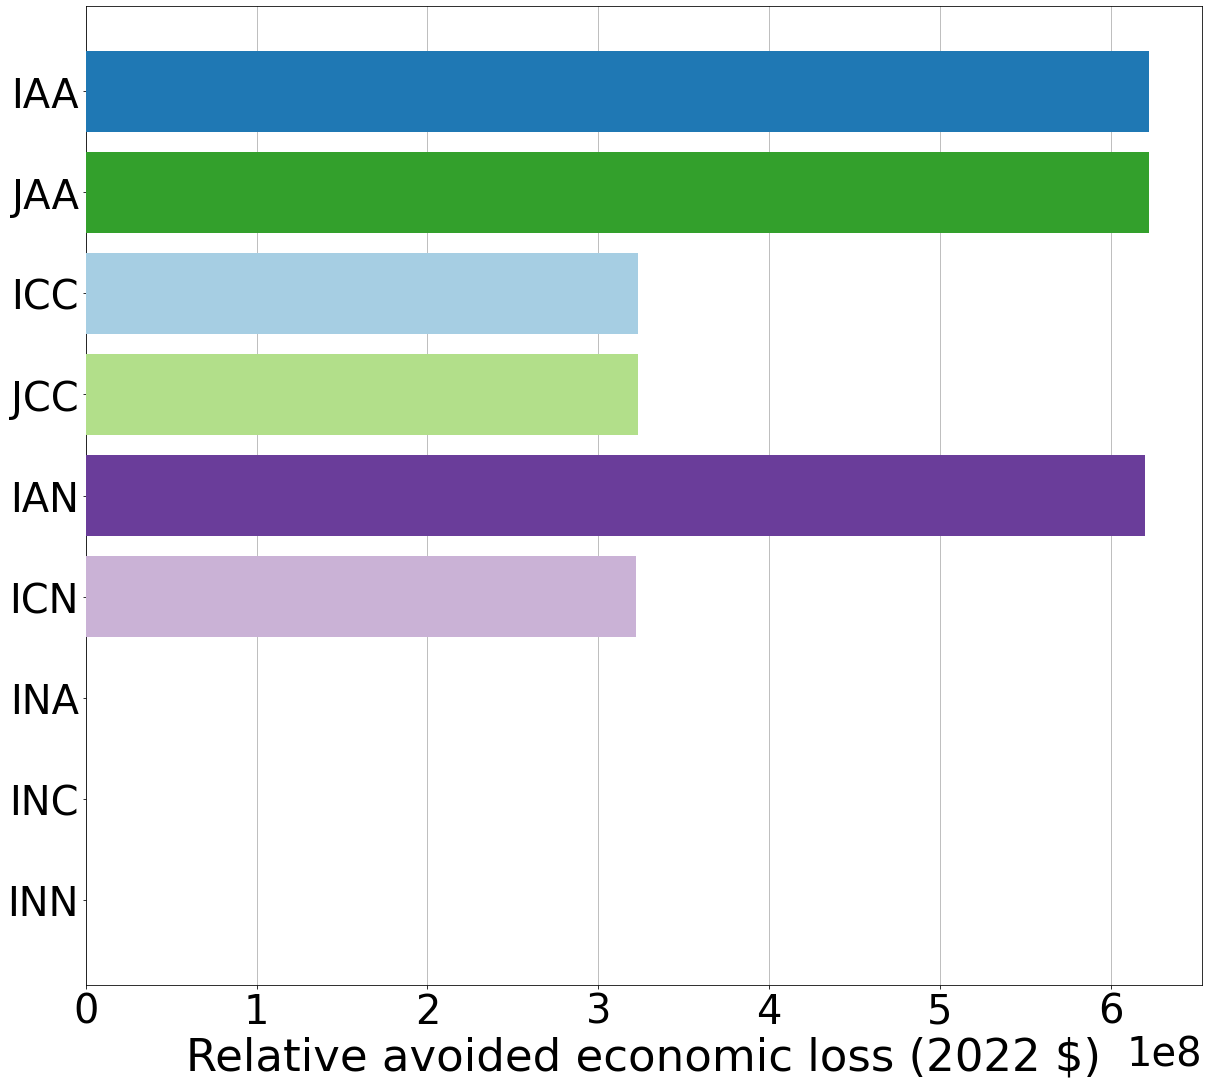

In [242]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [151]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.yticks(fontsize=18)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

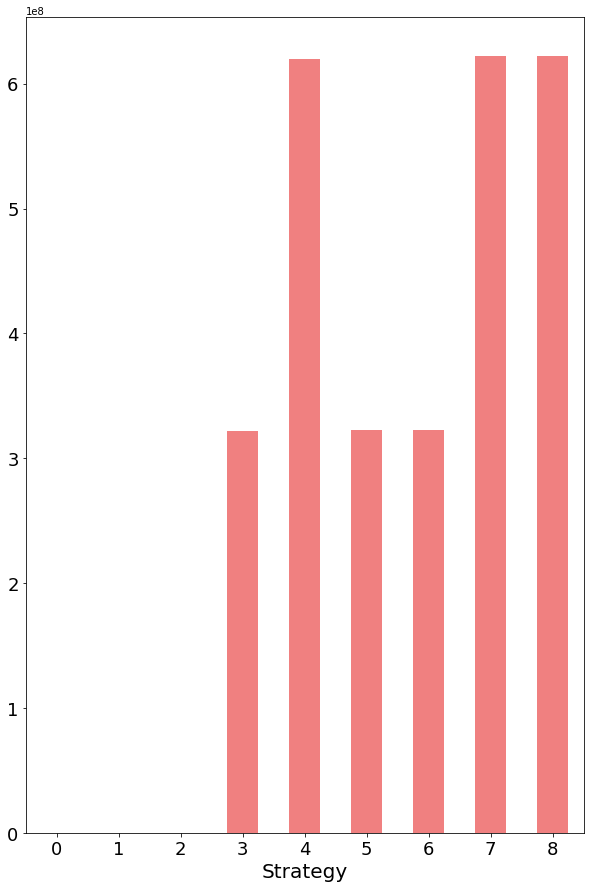

In [152]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [153]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [154]:
df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

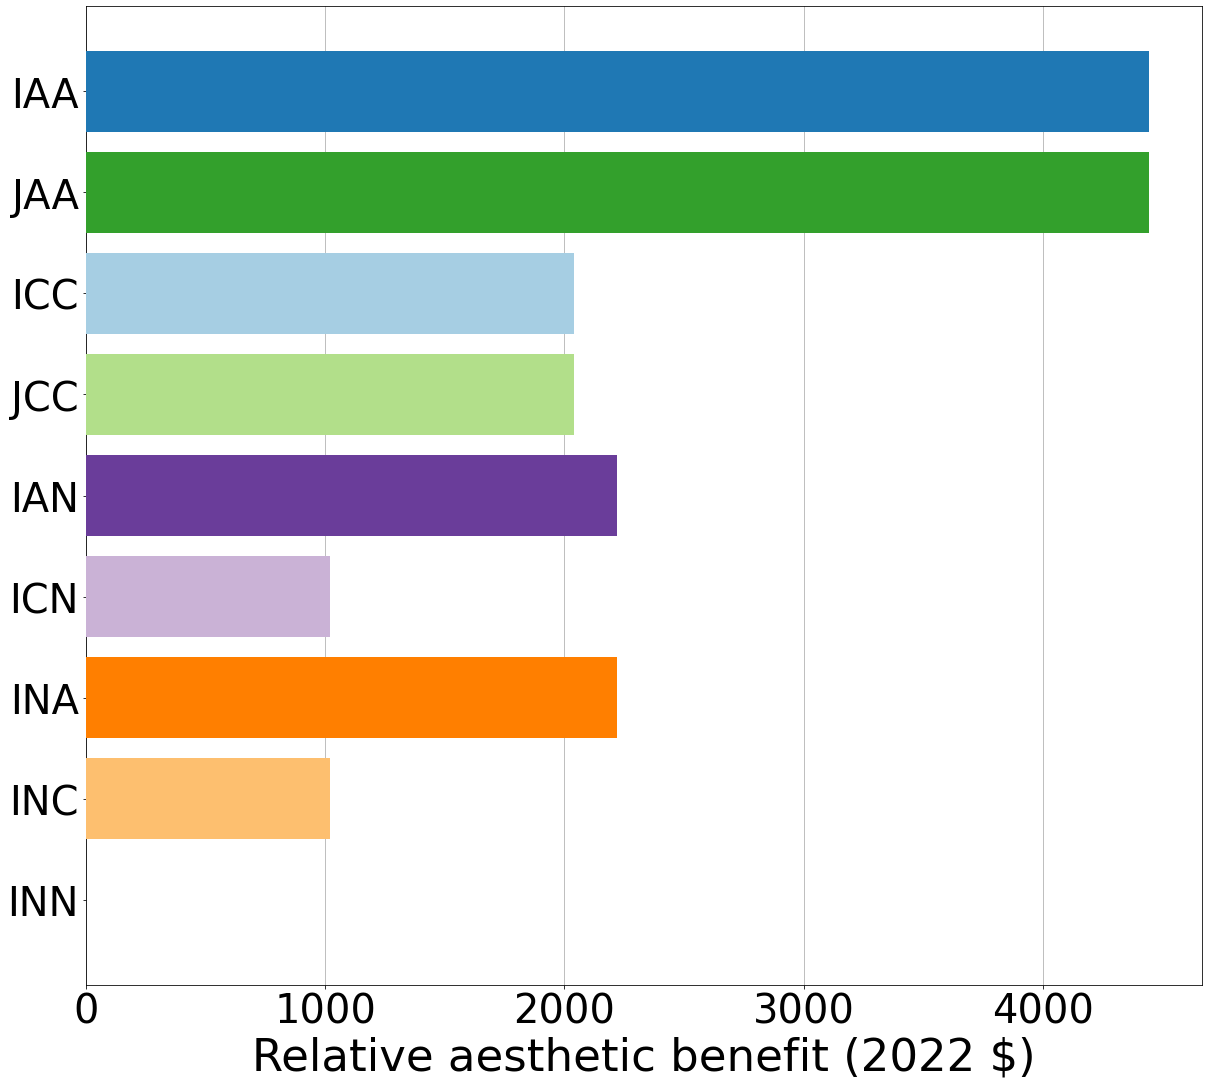

In [243]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [244]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
##plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=26)
#plt.yticks(fontsize=26)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

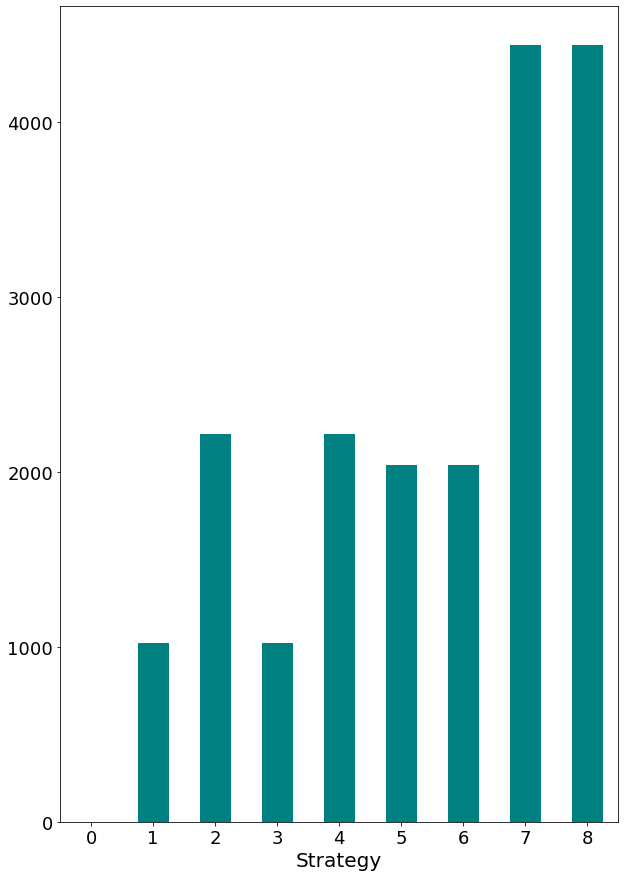

In [245]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [246]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,2330000.0,0.000000e+00,2880000.0,5210000.0,0.0,0.0,-5210000.0
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0
ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0
IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0
JCC,26700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0
ICC,28800000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0
JAA,63300000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0
IAA,65100000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0


In [247]:
df_npv_cost_loss_benefit['benefit_loss']=df_npv_cost_loss_benefit['aesthetic_benefit']+df_npv_cost_loss_benefit['economic_losses']
df_npv_cost_loss_benefit['cost_benefit_ratio']=df_npv_cost_loss_benefit['total_cost']/df_npv_cost_loss_benefit['benefit_loss']
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INN,2330000.0,0.000000e+00,2880000.0,5210000.0,0.0,0.0,-5210000.0,0.0,inf
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,1.803922e+04
INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0,2220.0,1.711712e+04
ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0,322001020.0,5.900602e-02
IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0,620002220.0,6.290300e-02
JCC,26700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0,323002040.0,1.046433e-01
ICC,28800000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0,323002040.0,1.111448e-01
JAA,63300000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0,622004440.0,1.208995e-01
IAA,65100000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0,622004440.0,1.237933e-01


In [248]:
df_pareto_plots=df_npv_cost_loss_benefit.copy()

In [249]:
df_pareto_plots=df_pareto_plots.loc[df_pareto_plots.index!='INN']
df_pareto_plots

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,18039.215686
INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0,2220.0,17117.117117
ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0,322001020.0,0.059006
IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0,620002220.0,0.062903
JCC,26700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0,323002040.0,0.104643
ICC,28800000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0,323002040.0,0.111145
JAA,63300000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0,622004440.0,0.120899
IAA,65100000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0,622004440.0,0.123793


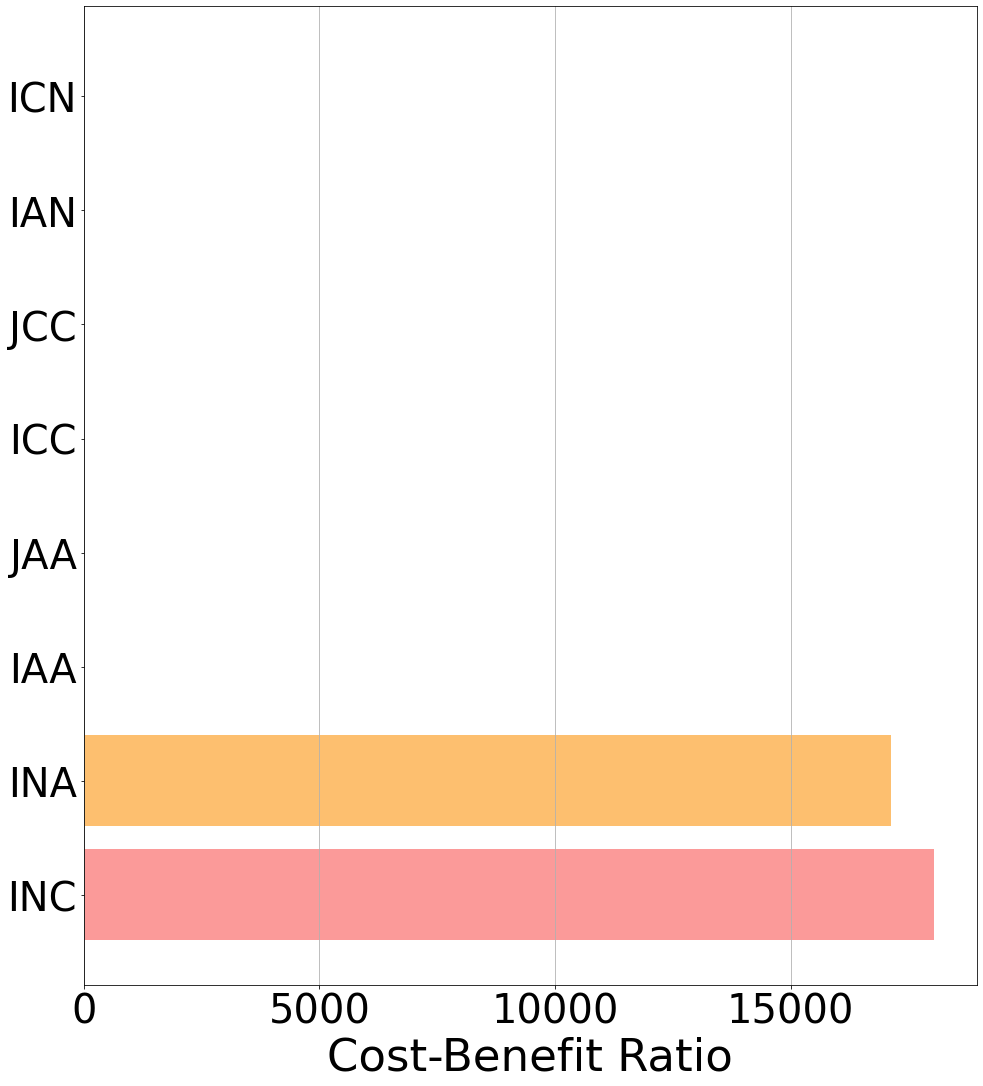

In [250]:
# Sorting the DataFrame based on 'cost_benefit_ratio'
df_pareto_sorted = df_pareto_plots.sort_values(by='cost_benefit_ratio', ascending=False)

# Colors as specified by user
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

# Creating the Pareto plot
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_pareto_sorted.index, df_pareto_sorted['cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])
ax.set_xlabel('Cost-Benefit Ratio', fontsize=45)
#ax.set_xticks(fontsize=40)
#ax.set_yticks(fontsize=40)
ax.tick_params(axis='x', labelsize=40)  
ax.tick_params(axis='y', labelsize=40)  
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.show()

In [251]:
df_pareto_sorted['log_of_cost_benefit_ratio']=np.log(df_pareto_sorted['cost_benefit_ratio'])
df_pareto_sorted

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio,log_of_cost_benefit_ratio
Strategy,,,,,,,,,,
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,18039.215686,9.800303
INA,32400000.0,2.539788e+06,3030000.0,38000000.0,2220.0,0.0,-38000000.0,2220.0,17117.117117,9.747834
IAA,65100000.0,5.079576e+06,6840000.0,77000000.0,4440.0,622000000.0,545000000.0,622004440.0,0.123793,-2.089142
JAA,63300000.0,5.079576e+06,6840000.0,75200000.0,4440.0,622000000.0,547000000.0,622004440.0,0.120899,-2.112796
ICC,28800000.0,1.713431e+06,5360000.0,35900000.0,2040.0,323000000.0,287000000.0,323002040.0,0.111145,-2.196921
JCC,26700000.0,1.713431e+06,5360000.0,33800000.0,2040.0,323000000.0,289000000.0,323002040.0,0.104643,-2.257198
IAN,32700000.0,2.539788e+06,3810000.0,39000000.0,2220.0,620000000.0,581000000.0,620002220.0,0.062903,-2.766161
ICN,14300000.0,8.567154e+05,3810000.0,19000000.0,1020.0,322000000.0,303000000.0,322001020.0,0.059006,-2.830116


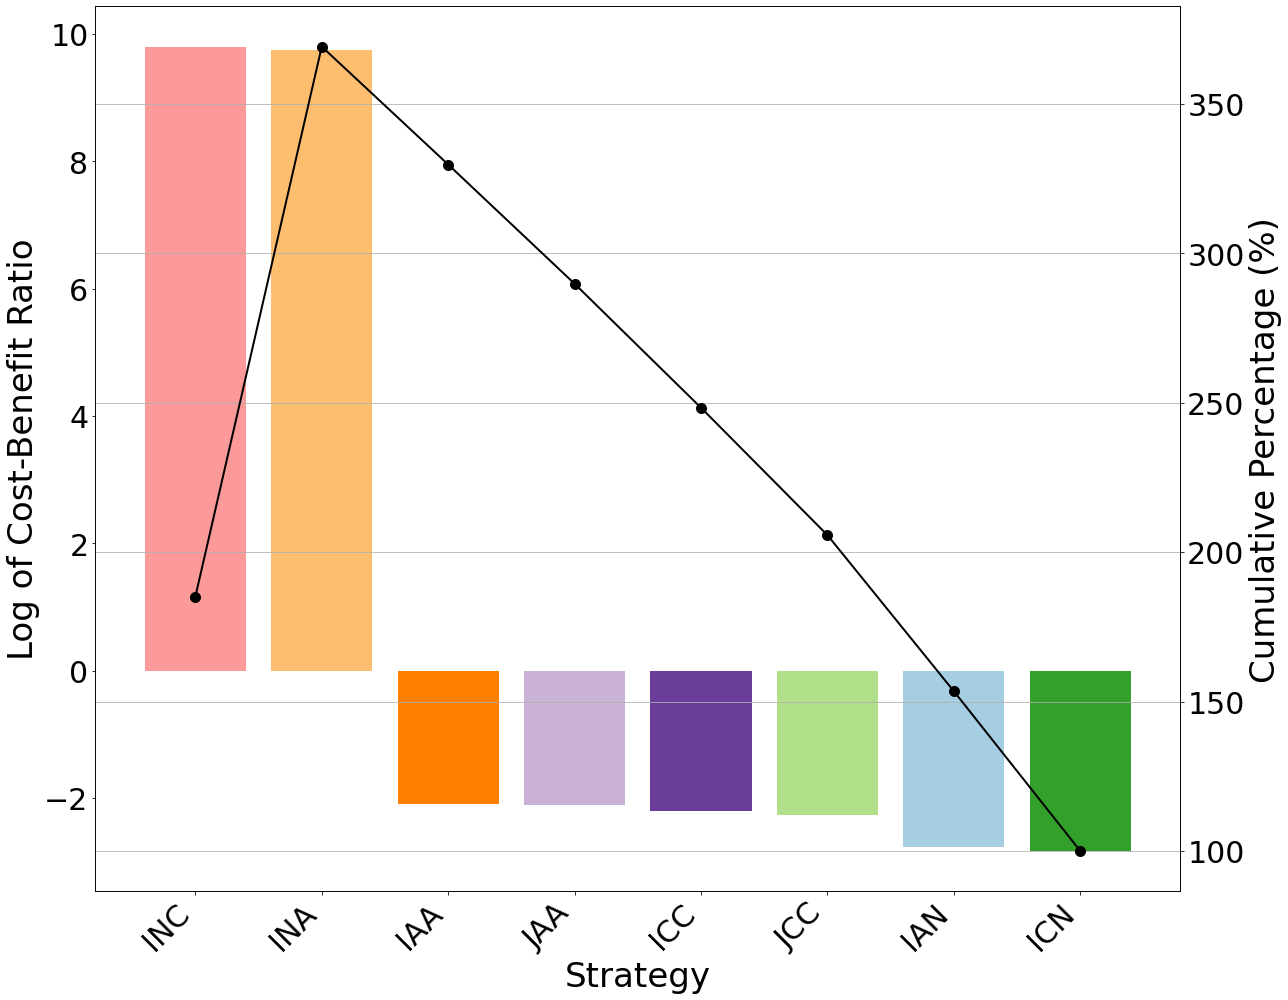

In [252]:
# Calculate cumulative percentage
df_pareto_sorted['cumulative_pct'] = df_pareto_sorted['log_of_cost_benefit_ratio'].cumsum() / df_pareto_sorted['log_of_cost_benefit_ratio'].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
bar_positions = range(len(df_pareto_sorted))
bars = ax.bar(bar_positions, df_pareto_sorted['log_of_cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])

# Set strategies as x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_pareto_sorted.index, rotation=45, ha="right")

# Plot the cumulative percentage line
# Note: We need to ensure the line starts at the first bar and ends at the last one accurately
ax2 = ax.twinx()
ax2.plot(bar_positions, df_pareto_sorted['cumulative_pct'], color='black', marker='o', linestyle='-', linewidth=2, ms=10)

# Labeling
ax.set_xlabel('Strategy', fontsize=34)
ax.set_ylabel('Log of Cost-Benefit Ratio', fontsize=34)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=34)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30)  
ax2.tick_params(axis='y', labelsize=30)  

plt.grid(True)
plt.tight_layout()
plt.show()
